## Ex 1: Uniform Gravity

In [10]:
import matplotlib.pyplot as plt
from space_base import GravBody, Probe


def projectile(_, posvel):
    current_gravity = gravity
    return posvel[1], -current_gravity


# Constants
G = 6.67e-11  # Gravitational constant
earth = GravBody.earth()  # Earth as an object with mass and radius
gravity = 9.81  # simple gravity

# Initial Conditions
x0 = 0  # start position
vx0 = 850  # start vertical speed
t_num = 1400  # number of steps in trajectory


To compute the time of the flight we can just solve the SUVAT equation like follow:

$$v=u-gt$$
$$s=ut-\frac{1}{2}gt^2$$
$$0=ut-\frac{1}{2}gt^2$$
$$t*(u-\frac{1}{2}gt)=0$$
So,
$t=0$ and $t=\frac{2*u}{g}$

In [11]:
t_final = (2*vx0) / gravity  # time of trajectory given
t_final

173.2925586136595

In [12]:
# Running Solver
probe = Probe(projectile, t_final, t_num, x0=x0, vx0=vx0, event=0)  # probe as an object
in_energy = 0.5 * probe.mass * probe.posvel0[1] ** 2 + probe.mass * gravity * x0  # initial energy
t, posvel = probe.odesolve()  # solve the differential equations

# Solver Results
t_end = len(t) - 1  # last value of array
fin_energy = 0.5 * probe.mass * posvel[t_end][1] ** 2 + probe.mass * gravity * posvel[t_end][0]  # final energy
accuracy = (fin_energy - in_energy) / in_energy  # accuracy of solver
accuracy

4.833854193505944e-16

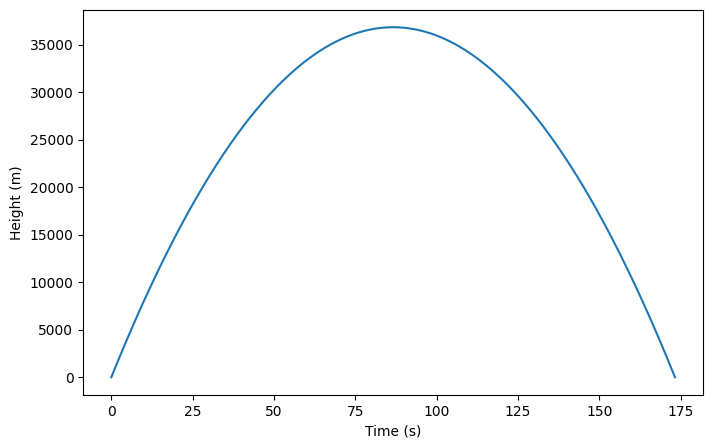

In [13]:
# Plotting
plt.figure(figsize=(8, 5))  # create figure, figsize can be changed as preferred
plt.plot(t, posvel[:, 0])  # plot time against height
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.show()  # make plot appear

The final graph is a parabola. This is because the altitude (z) follows a second order equation.